In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
x= iris.data
y= iris.target

df= pd.DataFrame(x,columns= iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
new_df= df.copy()

In [6]:
new_df['class'] = y
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
X = new_df.iloc[:, :4] #  fitur
y= new_df['class'] # target

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Ensemble Learning

## Stacking

### Voting Ensemble

atau majority voting ensembles adalah ML ensemble model yang mengkombinasikan prediksi dari beberapa model lain. Digunakan untuk improve predictions

Bisa digunakan untuk klasifikasi dan regresi. Dalam kasus **regresi**, ikut mengkalkulasikan **rata-rata dari prediksi tiap model**. Dalam kasus **klasifikasi**, prediksi dari tiap label dijumlahkan dan label dengan **vote terbanyak yang terpilih**

**Hard Voting** : Memprediksi kelas dengan jumlah vote terbesar

**Soft Voting** : Memprediksi kelas dengan jumlah probabilitas terbesar

*Kapan menggunakan Voting ensemble?*

- Menghasilkan performance yang lebih baik dibandingkan model lain yang digunakan pada saat ensemble
- Menghasilkan varians yang lebih rendah dibandingkan model lain yg digunakan pada saat ensemble




In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [11]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [12]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9111111111111111
RandomForestClassifier 0.8888888888888888
SVC 0.9333333333333333
VotingClassifier 0.9111111111111111



Soft voting 

In [13]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [14]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9111111111111111
RandomForestClassifier 0.8888888888888888
SVC 0.9333333333333333
VotingClassifier 0.9111111111111111


# Parallel Ensemble Learning (Bagging) 

Bagging atau Bootstrap Aggregation mengurangi error learning/varians dengan mengimplementasikan algoritma machine learning yg sama (cth. Random Forest terdiri dari algoritma decision tree)

intinya, bagging menggunakan beberapa base learners (contohnya decision tree) yang di train secara terpisah dengan random sample dari training set. Dengan menggunakan voting atau mengambil rerata dari hasil nya akan menghsilkan model yang akurat dan stabil.

https://towardsdatascience.com/ensemble-learning-bagging-boosting-3098079e5422

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
#n_estimators : berapa banyak tree
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9111111111111111


tanpa bagging

In [17]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.9111111111111111


## Random Forest

Disadventages of Decision Tree
1. Kalo tree depth nya maksimum (default setting), akan nge capture semua details di training set
2. ketika di apply ke data test akan ngasih nilai error yang tinggi karena varians yang tinggi (Overfit to Training data)

Random Forests atau Random Decision Forests adalah metode ensemble learning untuk klasifikasi dan regresi yang beroperasi dengan membangun beberapa decision tree yang independen (menggunakan bootstrap) dan hasil ouput nya dengan cara mengambil keputusan terbanyak dari semua hasil prediksi sebagai final output.

Random forests dapat mengurangi overfitting/varians dengan mengeneralisir pola data nya dibandingkan mempelajari pola datanya


In [18]:
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_moons

# X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, random_state=42)

In [20]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [21]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [22]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # very similar predictions

0.9777777777777777

artinya penerapan bagging di decision tree similar dengan random forest

### Feature Importance

Salah satu metode dalam feature selection

In [23]:
#misal dengan dataset iris
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [24]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

**Plotting feature importance**

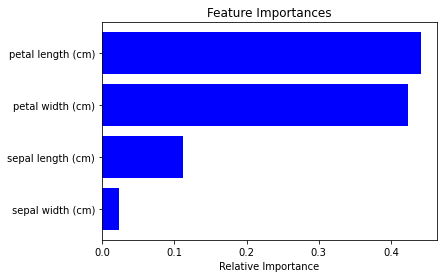

In [25]:
features = iris['feature_names']
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [26]:
feat = pd.DataFrame(rnd_clf.feature_importances_)
feat = feat.T
feat.columns = iris.feature_names

<AxesSubplot:>

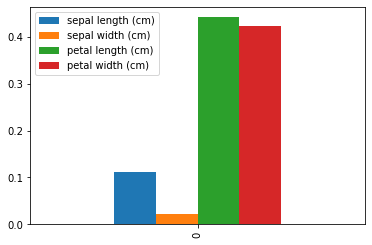

In [36]:
feat.plot(kind='bar')

**Out of Bag Evaluation**

Salah satu metode validasi yang dipakai random forest untuk meminimalisir hasil varians yg tinggi

Advantages of OOB

1. Tidak ada data yang leak, model divalidasi hanya dengan OOB sample, sehingga data tidak digunakan pada training model.
2. Less Variance
3. Better Predictive Model
4. Less Computation

Disadvantages of OOB

1. Time consuming
2. Tidak untuk dataset yang besar
3. paling baik digunakan pada dataset yang kecil-medium



https://www.analyticsvidhya.com/blog/2020/12/out-of-bag-oob-score-in-the-random-forest-algorithm/

In [27]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9523809523809523

In [28]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9111111111111111

# Sequential Ensemble Learning (Boosting)

 Boosting berbanding terbalik dengan bagging. Kalau di bagging, tiap base learners nya itu independent tapi kalo di boosting tiap base learners nya saling dependent. Dengan mencoba untuk meng improve atau mengoreksi kesalahan pada base learner sebelumnya.
 
 Mengurangi bias

 Algoritma boosting lainnya: Adaboost (Adaptive Boosting), XGBoost (Extreme Gradient Boosting), Catboost, LightGBM.

 Perbedaan dari masing2 metode adalah dari bagaimana error nya ditanggulangi (seperti me-modify weights atau mengurangi loss function)
 
 https://towardsdatascience.com/ensemble-learning-bagging-boosting-3098079e5422
 
## Adaboost

Mengimplementasikan vector of weights untuk menanggulangi sample yang salah diprediksi(dengan meningkatkan weight nya) dan memberi reward bagi sample yang benar diprediksi

In [29]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

#Learning rate: semakin besar nilai learning rate semakin cepat processing time, range 0-1, \
    # Semakin kecil learning rate nya semakin lama tapi hasilnya bagus

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [30]:
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

SAMME (yang merupakan singkatan dari Stagewise Additive Modeling using a Multiclass Exponential loss function). Ketika hanya ada dua kelas, SAMME equivalent dengan AdaBoost. 
Jika prediktor dapat memperkirakan probabilitas kelas (yaitu, jika mereka memiliki metode predict_proba()), Scikit-Learn dapat menggunakan varian SAMME yang disebut SAMME.R (R singkatan dari “Real”), yang bergantung pada probabilitas kelas daripada prediksi dan umumnya berkinerja lebih baik.


Learning rate, merupakan salah satu parameter training untuk menghitung nilai koreksi bobot pada waktu proses training. Nilai learning rate ini berada pada range nol (0) sampai (1). **Semakin besar nilai learning rate**, maka proses training akan berjalan **semakin cepat**. Semakin besar learning rate, maka **accuracy akan cenderung semakin berkurang**, tetapi berlaku sebaliknya, apabila learning rate-nya semakin kecil, maka accuracy akan semakin besar atau bertambah dengan konsekuensi proses training akan memakan waktu yang semakin lama.

In [31]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3), n_estimators=200,
    algorithm="SAMME", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [32]:
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9555555555555556

## XGBoost

Implementaisnya dengan mengkalkulasikan gradient untuk mengoptimasi loss function nya

In [33]:
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from xgboost import XGBClassifier

In [34]:
xgb_reg = XGBClassifier(n_estimators=200,random_state=42)
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

In [35]:
xgb = XGBClassifier(n_estimators=200, random_state=42)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 93.33
Time consumed for training: 0.157
Time consumed for prediction: 0.00079 seconds
